In [139]:
import numpy as np
from numpy import random as random
import matplotlib.pyplot as plt


In [140]:
#variables
size=20 #int(input("Number Of Trades"))
scale=.2
prices=np.zeros(size)
pricesAv=np.zeros(size)
pricesAv2=np.zeros(size)
pricesV=np.zeros(size)
pricesAcc=np.zeros(size)
buy=np.zeros(size)
time=np.zeros(size)
amt=1/10**5
cutoff=10
Total=1000
NumberOfTrades=0
buyCredits=0
profit=np.zeros(size)
start=Total


In [141]:
def average(array,n,s):
    if(n==0):
        return array[(n)]
    else:
        return ((average(array,n-1,s) + array[(np.clip(n , 0 , s-1))])/2)
    
    

In [142]:
gen=True

#random value function
def R(MAX):
    return (random.randint(0,MAX))

if(gen):    
    open('prices.txt', 'w').close()
    for x in range(size):
        f=open("prices.txt","a")
        f.write(str(R(10000)))
        f.write("\n")
    f.close()

In [143]:
for x in range(size):
    temp=open('prices.txt','r').read().split('\n')
    prices[(x)]=temp[(x)]
    time[(x)]=x

zero= prices.mean()
MaximumGraphValue= prices.max() 
MinimumGraphValue= prices.min()

In [144]:
for x in range(size):
    pricesAv[(x)]  =  average(prices,x,size)

In [145]:
for x in range(size):
    pricesV[(x)]=(prices[(x)]-prices[(np.clip(x-1,0,size))])
    pricesAcc[(x)]=pricesV[(x)]-pricesV[(np.clip(x-1,0,size))]

In [146]:
#Algorithm 1
def algo1():
    for x in range(size):
        if(pricesAcc[(x)]==0):
            buy[(x)]=zero
        else:
            if(pricesV[(x)]-pricesAcc[(x)]<scale):
                buy[(x)]=1*MaximumGraphValue #buy
            elif(pricesV[(x)]-pricesAcc[(x)]>scale):
                buy[(x)]=1*MinimumGraphValue #sell

In [147]:
def initFile(filename):
    file=open(filename,'w')
    file.write("")
    file.close()


    file=open(filename,'a')
    file.write("ID,Amount,At Price,Total")
    file.write("\n")
    file.close()

initFile('trades.csv')

algo1()

amt=1/10**10
cutoff=10
Total=1000
NumberOfTrades=0
buyCredits=0
profit=np.zeros(size)
start=Total

for id,x in enumerate(prices):
    if(Total>cutoff):
        if(buy[(id)]>zero):
            Total=Total-x*amt
            buyCredits+=1

            NumberOfTrades+=1
            profit[(id)]=(Total-start)
        elif((buy[(id)]<zero)and(buyCredits!=0)):
            Total=Total+x*amt
            buyCredits-=1

            profit[(id)]=(Total-start)
    elif(Total<cutoff):
        Total=Total #+int(input("Enter Funds"))
        


print("{} Profit in {} Trades out of {} Total possible Trades".format(Total-start,NumberOfTrades,size))
print(Total)

-6.927000413270434e-07 Profit in 9 Trades out of 20 Total possible Trades
999.9999993073


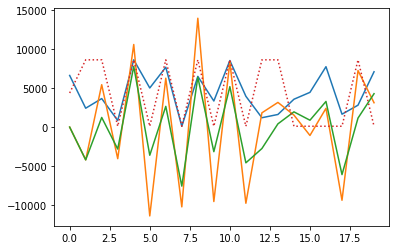

In [150]:
plt.plot(time,prices)
plt.plot(time,pricesAcc)
plt.plot(time,pricesV)
plt.plot(time,buy,':')
plt.show()
